In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Survey on Phishing Susceptibility and Deepfake Detection (Responses)-2.csv")

In [3]:
df.head()

,Timestamp,What is your age?,What is your gender?,What is your highest level of education?,What is your level of familiarity with deepfake tech0logy?,I am less likely than others to fail for phishing using deepfake content.,"Compared to others like me, I can better identify deepfake images or videos.",I feel confident that I can detect fake media used in phishing attempts.,I usually trust messages that include professional-looking media.,I rely on gut feelings when deciding whether an image/ video is fake.,...,Is the image Real or AI-generated?.7,How confident are you that the image is Real or AI-generated?.7,Is the image Real or AI-generated?.8,How confident are you that the image is Real or AI-generated?.8,Is the image Real or AI-generated?.9,How confident are you that the image is Real or AI-generated?.9,Is the image Real or AI-generated?.10,How confident are you that the image is Real or AI-generated?.10,Is the image Real or AI-generated?.11,How confident are you that the image is Real or AI-generated?.11
0,4/15/2025 22:41:18,1,1,3,4,4,7,7,7,7,...,0,5.0,0,5.0,0,5.0,0,5.0,1.0,5.0
1,4/15/2025 23:00:58,2,1,3,6,5,6,6,3,2,...,1,5.0,1,5.0,1,3.0,1,4.0,0.0,4.0
2,4/15/2025 23:19:19,2,1,3,5,3,5,5,4,6,...,1,3.0,0,3.0,1,4.0,1,3.0,0.0,5.0
3,4/15/2025 23:28:35,2,1,3,1,2,6,5,4,5,...,1,3.0,1,3.0,1,3.0,1,3.0,0.0,4.0
4,4/15/2025 23:30:18,2,1,3,3,3,4,4,4,4,...,1,3.0,1,4.0,0,4.0,1,4.0,0.0,4.0


# Basic Info

In [5]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nInfo:\n")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

Shape: (72, 38)

Columns:
 ['Timestamp', 'What is your age?', 'What is your gender?', 'What is your highest level of education?', 'What is your level of familiarity with deepfake tech0logy?', 'I am less likely than others to fail for phishing using deepfake content.', 'Compared to others like me, I can better identify deepfake images or videos.', 'I feel confident that  I can detect fake media used in phishing attempts.', 'I usually trust messages that include professional-looking media.', 'I rely on gut feelings when deciding whether an image/ video is fake.', 'I often make quick decisions without verifying the source of the visuals.', 'I verify the identity of the sender before trusting a message with media.', 'I use online tools or sources to check whether visuals are authentic.', 'I consider the possibility of AI manipulation when evaluating images/ videos.', 'Is the image Real or AI-generated?', 'How confident are you that the image is Real or AI-generated?', 'Is the image Real or

# Descriptive Statistics

In [7]:
print("\nDescriptive statistics (numeric columns):\n")
print(df.describe())


Descriptive statistics (numeric columns):

       What is your age?  What is your gender?  \
count          72.000000             72.000000   
mean            1.708333              0.722222   
std             0.680462              0.451046   
min             1.000000              0.000000   
25%             1.000000              0.000000   
50%             2.000000              1.000000   
75%             2.000000              1.000000   
max             4.000000              1.000000   

       What is your highest level of education?  \
count                                 72.000000   
mean                                   2.611111   
std                                    0.518817   
min                                    1.000000   
25%                                    2.000000   
50%                                    3.000000   
75%                                    3.000000   
max                                    3.000000   

       What is your level of familiarity with

# Demographics

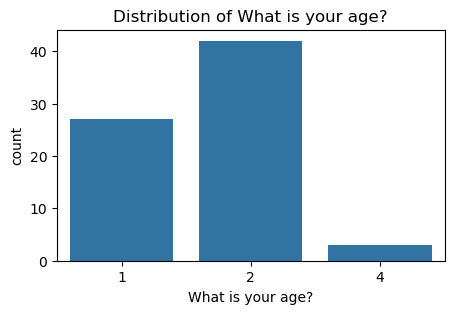

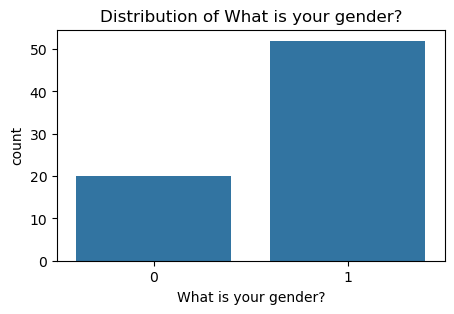

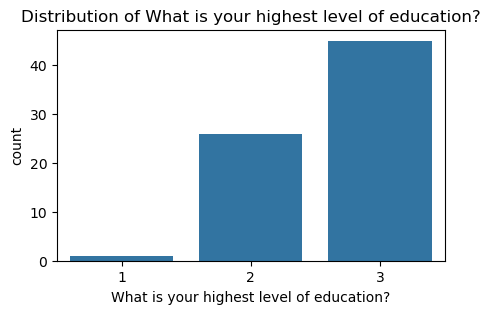

In [9]:
demographic_cols = [
    'What is your age?',
    'What is your gender?',
    'What is your highest level of education?'
]

for col in demographic_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Familiarity and Confidence

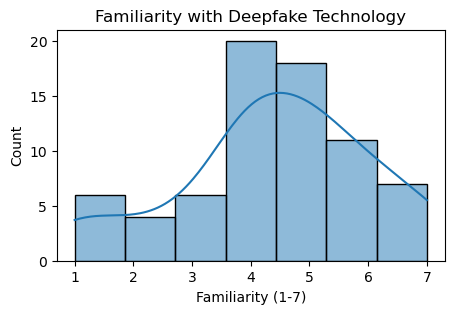

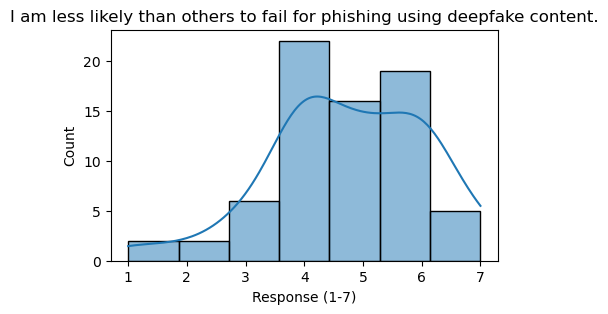

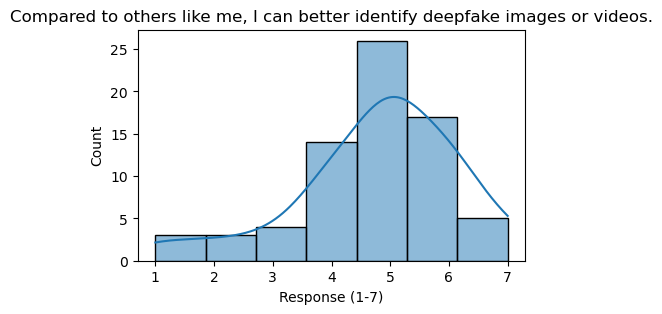

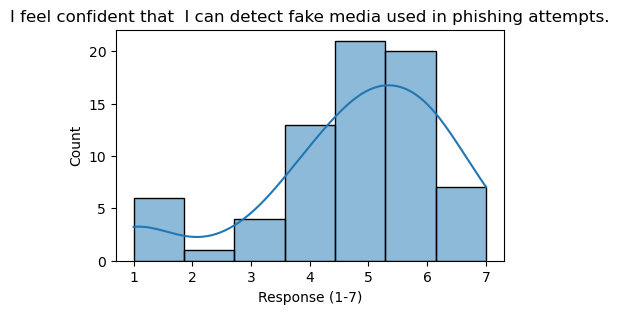

In [11]:
familiarity_col = 'What is your level of familiarity with deepfake tech0logy?'
confidence_cols = [
    'I am less likely than others to fail for phishing using deepfake content.',
    'Compared to others like me, I can better identify deepfake images or videos.',
    'I feel confident that  I can detect fake media used in phishing attempts.'
]

plt.figure(figsize=(5,3))
sns.histplot(df[familiarity_col], bins=7, kde=True)
plt.title('Familiarity with Deepfake Technology')
plt.xlabel('Familiarity (1-7)')
plt.show()

for col in confidence_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], bins=7, kde=True)
    plt.title(col)
    plt.xlabel('Response (1-7)')
    plt.show()

# Behavioural Questions

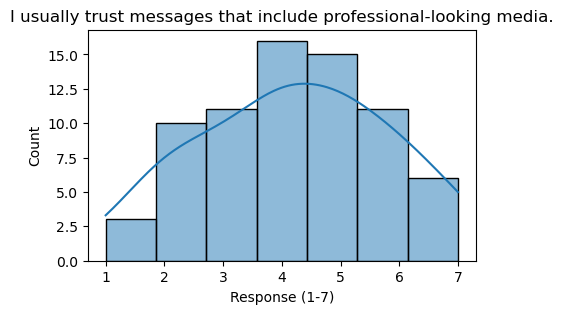

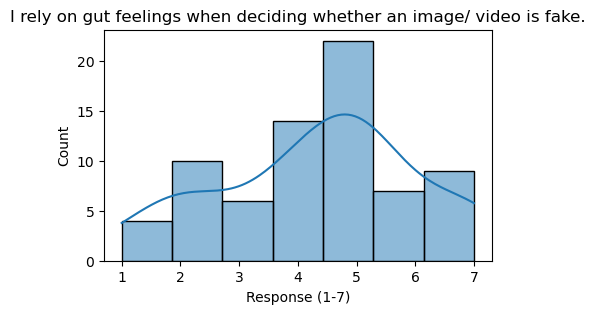

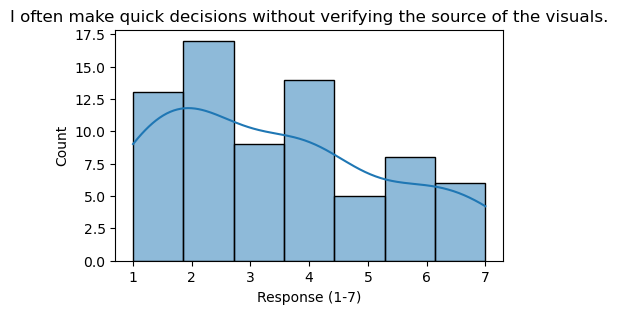

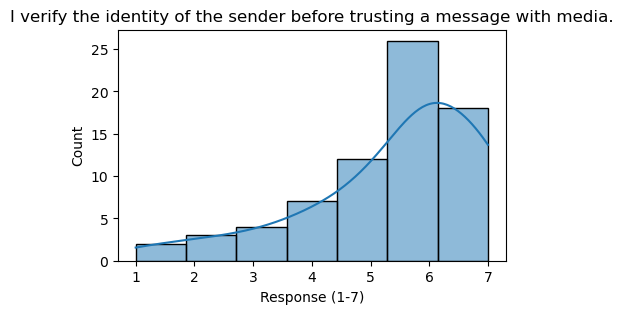

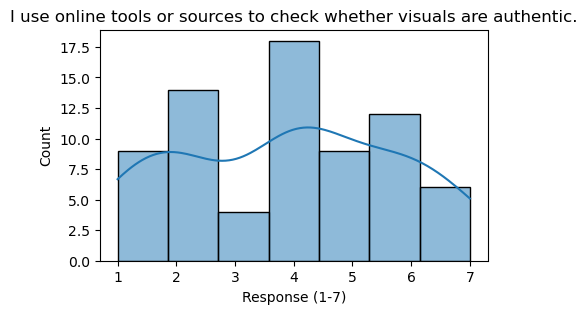

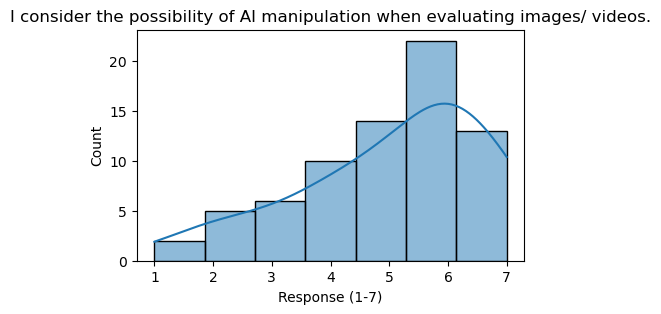

In [13]:
behavior_cols = [
    'I usually trust messages that include professional-looking media.',
    'I rely on gut feelings when deciding whether an image/ video is fake.',
    'I often make quick decisions without verifying the source of the visuals.',
    'I verify the identity of the sender before trusting a message with media.',
    'I use online tools or sources to check whether visuals are authentic.',
    'I consider the possibility of AI manipulation when evaluating images/ videos.'
]
for col in behavior_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], bins=7, kde=True)
    plt.title(col)
    plt.xlabel('Response (1-7)')
    plt.show()

# --- IMAGE JUDGMENT ACCURACY & CONFIDENCE ---
# Finding all columns related to image judgments

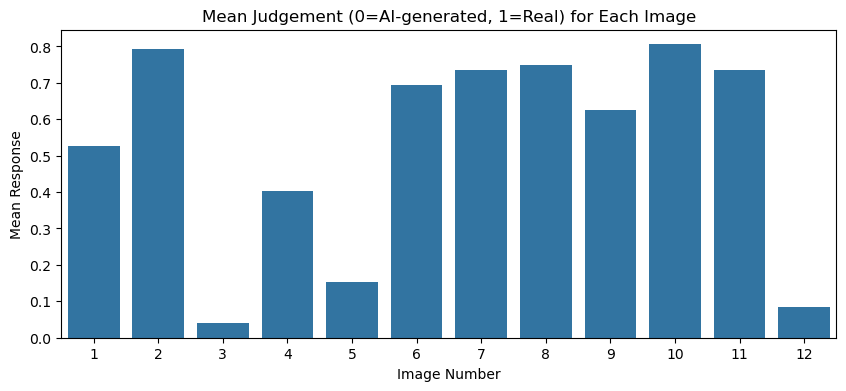

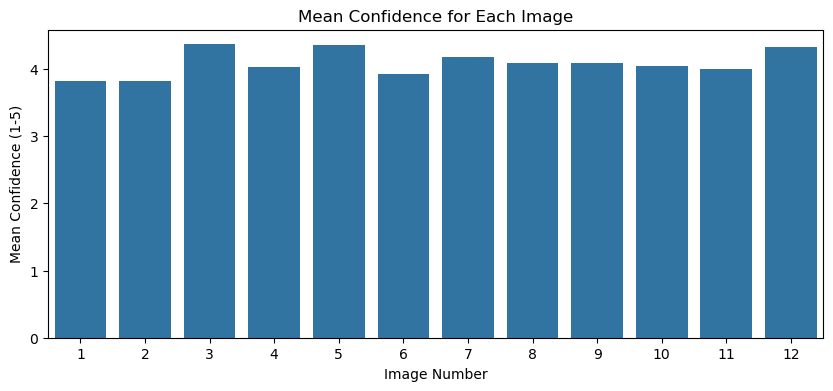

In [15]:
image_cols = [col for col in df.columns if 'Is the image Real or AI-generated?' in col]
confidence_image_cols = [col for col in df.columns if 'How confident are you that the image is Real or AI-generated?' in col]

# Calculate accuracy (assuming 0=real, 1=AI-generated, or as per your encoding)
image_means = df[image_cols].mean()
plt.figure(figsize=(10,4))
sns.barplot(x=np.arange(1, len(image_means)+1), y=image_means.values)
plt.title('Mean Judgement (0=AI-generated, 1=Real) for Each Image')
plt.xlabel('Image Number')
plt.ylabel('Mean Response')
plt.show()

# Confidence
confidence_means = df[confidence_image_cols].mean()
plt.figure(figsize=(10,4))
sns.barplot(x=np.arange(1, len(confidence_means)+1), y=confidence_means.values)
plt.title('Mean Confidence for Each Image')
plt.xlabel('Image Number')
plt.ylabel('Mean Confidence (1-5)')
plt.show()

In [16]:
# Convert: Real = 1, AI-generated = 0
for col in image_cols:
    df[col] = df[col].replace({1: 1, 0: 0})  # If already in 1/0, this is fine
    # If the original coding was reversed, swap as needed:
    # df[col] = df[col].replace({1: 0, 0: 1})

# If you are SURE the original coding is Real=0, AI-generated=1, then swap:
# for col in image_cols:
#     df[col] = df[col].replace({0: 1, 1: 0})

# Get counts for each image column
for col in image_cols:
    print(f"\nCounts for '{col}':")
    print(df[col].value_counts(dropna=False).sort_index())


Counts for 'Is the image Real or AI-generated?':
Is the image Real or AI-generated?
0    34
1    38
Name: count, dtype: int64

Counts for 'Is the image Real or AI-generated?.1':
Is the image Real or AI-generated?.1
0    15
1    57
Name: count, dtype: int64

Counts for 'Is the image Real or AI-generated?.2':
Is the image Real or AI-generated?.2
0    69
1     3
Name: count, dtype: int64

Counts for 'Is the image Real or AI-generated?.3':
Is the image Real or AI-generated?.3
0    43
1    29
Name: count, dtype: int64

Counts for 'Is the image Real or AI-generated?.4':
Is the image Real or AI-generated?.4
0    61
1    11
Name: count, dtype: int64

Counts for 'Is the image Real or AI-generated?.5':
Is the image Real or AI-generated?.5
0    22
1    50
Name: count, dtype: int64

Counts for 'Is the image Real or AI-generated?.6':
Is the image Real or AI-generated?.6
0    19
1    53
Name: count, dtype: int64

Counts for 'Is the image Real or AI-generated?.7':
Is the image Real or AI-generated?.

In [17]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore


# =================================================================
# 1. Optimism Bias Composite Score
# =================================================================
optimism_vars = [
    'I am less likely than others to fail for phishing using deepfake content.',
    'Compared to others like me, I can better identify deepfake images or videos.',
    'I feel confident that  I can detect fake media used in phishing attempts.'
]

# Check reliability (Cronbach's Alpha)
alpha = df[optimism_vars].copy().dropna().corr().mean().mean()
print(f"Optimism Bias Reliability (Cronbach's α): {alpha:.2f}")

# Create composite (mean of z-scores)
df['optimism_bias'] = zscore(df[optimism_vars].mean(axis=1))

# =================================================================
# 2. Heuristic Processing Composite Score
# =================================================================
heuristic_vars = [
    'I rely on gut feelings when deciding whether an image/ video is fake.',
    'I often make quick decisions without verifying the source of the visuals.',
    'I usually trust messages that include professional-looking media.'
]

# Reverse code trust question (higher = more heuristic)
df[heuristic_vars[2]] = 8 - df[heuristic_vars[2]]

# Create composite (min-max scaled)
scaler = MinMaxScaler()
df['heuristic_processing'] = scaler.fit_transform(
    df[heuristic_vars].mean(axis=1).values.reshape(-1,1)
)

# =================================================================
# 3. Systematic Processing Composite Score 
# =================================================================
systematic_vars = [
    'I verify the identity of the sender before trusting a message with media.',
    'I use online tools or sources to check whether visuals are authentic.',
    'I consider the possibility of AI manipulation when evaluating images/ videos.'
]

# Create composite (sum of items)
df['systematic_processing'] = df[systematic_vars].sum(axis=1)

# =================================================================
# Final Normalization (0-1 scale)
# =================================================================
composite_cols = ['optimism_bias', 'heuristic_processing', 'systematic_processing']
df[composite_cols] = MinMaxScaler().fit_transform(df[composite_cols])

print(df[composite_cols].describe())


Optimism Bias Reliability (Cronbach's α): 0.71
       optimism_bias  heuristic_processing  systematic_processing
count      72.000000             72.000000              72.000000
mean        0.607026              0.467262               0.584201
std         0.216261              0.184533               0.227451
min         0.000000              0.000000               0.000000
25%         0.470588              0.357143               0.437500
50%         0.647059              0.500000               0.562500
75%         0.764706              0.571429               0.765625
max         1.000000              1.000000               1.000000


In [18]:

# Identify the two Likert scale confidence columns
likert_cols = [
    'How confident are you that the image is Real or AI-generated?',
    'How confident are you that the image is Real or AI-generated?.1'
]

# --- 1. Optimism Bias (mean of the two confidence ratings, then z-score) ---
df['optimism_bias_img'] = zscore(df[likert_cols].mean(axis=1))

# --- 2. Heuristic Processing (minimum of the two confidence ratings, then min-max scale) ---
df['heuristic_processing_img'] = MinMaxScaler().fit_transform(
    df[likert_cols].min(axis=1).values.reshape(-1,1)
)

# --- 3. Systematic Processing (maximum of the two confidence ratings, then min-max scale) ---
df['systematic_processing_img'] = MinMaxScaler().fit_transform(
    df[likert_cols].max(axis=1).values.reshape(-1,1)
)

# --- Display descriptive statistics for the new composite variables ---
print(df[['optimism_bias_img', 'heuristic_processing_img', 'systematic_processing_img']].describe())


       optimism_bias_img  heuristic_processing_img  systematic_processing_img
count       7.200000e+01                 72.000000                  72.000000
mean       -2.343804e-16                  0.642361                   0.767361
std         1.007018e+00                  0.251147                   0.242226
min        -3.137217e+00                  0.000000                   0.000000
25%        -9.118020e-01                  0.500000                   0.500000
50%         2.009055e-01                  0.750000                   0.750000
75%         7.572593e-01                  0.750000                   1.000000
max         1.313613e+00                  1.000000                   1.000000


In [19]:
!pip install pingouin --upgrade

In [20]:
import pandas as pd
import pingouin as pg
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore


# 1. Optimism Bias Composite Score

optimism_vars = [
    'I am less likely than others to fail for phishing using deepfake content.',
    'Compared to others like me, I can better identify deepfake images or videos.',
    'I feel confident that  I can detect fake media used in phishing attempts.'
]

# Calculate Cronbach's Alpha
alpha_optimism = pg.cronbach_alpha(data=df[optimism_vars].dropna())
print(f"Optimism Bias Reliability (α): {alpha_optimism[0]:.2f} [CI: {alpha_optimism[1]}]")

# Create composite (mean of z-scores)
df['optimism_bias'] = zscore(df[optimism_vars].mean(axis=1))


# 2. Heuristic Processing Composite Score

heuristic_vars = [
    'I rely on gut feelings when deciding whether an image/ video is fake.',
    'I often make quick decisions without verifying the source of the visuals.',
    'I usually trust messages that include professional-looking media.'
]

# Reverse code trust question (higher = more heuristic)
df[heuristic_vars[2]] = 8 - df[heuristic_vars[2]]

# Calculate Cronbach's Alpha
alpha_heuristic = pg.cronbach_alpha(data=df[heuristic_vars].dropna())
print(f"Heuristic Processing Reliability (α): {alpha_heuristic[0]:.2f} [CI: {alpha_heuristic[1]}]")

# Create composite
scaler = MinMaxScaler()
df['heuristic_processing'] = scaler.fit_transform(
    df[heuristic_vars].mean(axis=1).values.reshape(-1,1)
)


# 3. Systematic Processing Composite Score

systematic_vars = [
    'I verify the identity of the sender before trusting a message with media.',
    'I use online tools or sources to check whether visuals are authentic.',
    'I consider the possibility of AI manipulation when evaluating images/ videos.'
]

# Calculate Cronbach's Alpha
alpha_systematic = pg.cronbach_alpha(data=df[systematic_vars].dropna())
print(f"Systematic Processing Reliability (α): {alpha_systematic[0]:.2f} [CI: {alpha_systematic[1]}]")

# Create composite
df['systematic_processing'] = df[systematic_vars].sum(axis=1)


# Final Normalization (0-1 scale)

composite_cols = ['optimism_bias', 'heuristic_processing', 'systematic_processing']
df[composite_cols] = MinMaxScaler().fit_transform(df[composite_cols])

print("\nComposite Score Summary:")
print(df[composite_cols].describe())


Optimism Bias Reliability (α): 0.80 [CI: [0.704 0.869]]
Heuristic Processing Reliability (α): 0.66 [CI: [0.503 0.779]]
Systematic Processing Reliability (α): 0.54 [CI: [0.315 0.696]]

Composite Score Summary:
       optimism_bias  heuristic_processing  systematic_processing
count      72.000000             72.000000              72.000000
mean        0.607026              0.468137               0.584201
std         0.216261              0.238674               0.227451
min         0.000000              0.000000               0.000000
25%         0.470588              0.294118               0.437500
50%         0.647059              0.470588               0.562500
75%         0.764706              0.647059               0.765625
max         1.000000              1.000000               1.000000


# Data Preparation and Accuracy Analysis

In [22]:
# Correct answers for 12 images (0=Real, 1= AI)
correct_answers = [1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0]  # Your provided sequence
image_cols = [f'Is the image Real or AI-generated?{"" if i==0 else f".{i-1}"}' 
             for i in range(12)]

In [23]:
# Correct list of image judgment columns from your data:
image_cols = [
    'Is the image Real or AI-generated?',        # Image 1 (no .0 suffix)
    'Is the image Real or AI-generated?.1',      # Image 2
    'Is the image Real or AI-generated?.2',      # Image 3
    'Is the image Real or AI-generated?.3',      # Image 4
    'Is the image Real or AI-generated?.4',      # Image 5
    'Is the image Real or AI-generated?.5',      # Image 6
    'Is the image Real or AI-generated?.6',      # Image 7
    'Is the image Real or AI-generated?.7',      # Image 8
    'Is the image Real or AI-generated?.8',      # Image 9
    'Is the image Real or AI-generated?.9',      # Image 10
    'Is the image Real or AI-generated?.10',     # Image 11
    'Is the image Real or AI-generated?.11'      # Image 12
]

# Use this list instead of auto-generated names


In [24]:
# Get columns programmatically (safer)
image_cols = [col for col in df.columns 
             if 'Is the image Real or AI-generated?' in col]

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Correct answers (1=Real, 0=AI)
correct_answers = [1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0]

# Calculate metrics
results = []
for i, col in enumerate(image_cols):
    y_true = [correct_answers[i]] * len(df)
    y_pred = df[col].dropna()
    
    results.append({
        'Image': i+1,
        'Accuracy': accuracy_score(y_true[:len(y_pred)], y_pred),
        'Precision': precision_score(y_true[:len(y_pred)], y_pred, zero_division=0),
        'Recall': recall_score(y_true[:len(y_pred)], y_pred, zero_division=0),
        'F1': f1_score(y_true[:len(y_pred)], y_pred, zero_division=0)
    })

metrics_df = pd.DataFrame(results)
print(metrics_df)


    Image  Accuracy  Precision    Recall        F1
0       1  0.527778        1.0  0.527778  0.690909
1       2  0.208333        0.0  0.000000  0.000000
2       3  0.958333        0.0  0.000000  0.000000
3       4  0.402778        1.0  0.402778  0.574257
4       5  0.847222        0.0  0.000000  0.000000
5       6  0.694444        1.0  0.694444  0.819672
6       7  0.263889        0.0  0.000000  0.000000
7       8  0.750000        1.0  0.750000  0.857143
8       9  0.625000        1.0  0.625000  0.769231
9      10  0.194444        0.0  0.000000  0.000000
10     11  0.736111        1.0  0.736111  0.848000
11     12  0.915493        0.0  0.000000  0.000000


# Confidence Analysis

In [27]:
# Get ALL image judgment columns and sort them numerically
image_cols = sorted(
    [col for col in df.columns if 'Is the image Real or AI-generated?' in col],
    key=lambda x: float(x.split('.')[-1]) if '.' in x else 0
)

# Get ALL confidence columns and sort them the same way
confidence_cols = sorted(
    [col for col in df.columns if 'How confident are you that the image is Real or AI-generated?' in col],
    key=lambda x: float(x.split('.')[-1]) if '.' in x else 0
)

# Verify we have 12 columns each
print(f"Image columns: {len(image_cols)}")
print(f"Confidence columns: {len(confidence_cols)}")

# Only proceed if both have 12 columns
if len(image_cols) == 12 and len(confidence_cols) == 12:
    confidence_stats = []
    for i in range(12):
        conf = df[confidence_cols[i]]
        pred = df[image_cols[i]].dropna().astype(int)  # Handle missing values
        correct = pred == correct_answers[i]
        
        # Calculate stats only if there are both correct/wrong responses
        if len(correct) > 0:
            confidence_stats.append({
                'Image': i+1,
                'Mean_Confidence': conf.iloc[pred.index].mean(),  # Align indices
                'SD_Confidence': conf.iloc[pred.index].std(),
                'Mean_Confidence_Correct': conf.iloc[pred.index][correct].mean(),
                'Mean_Confidence_Wrong': conf.iloc[pred.index][~correct].mean()
            })
    
    confidence_df = pd.DataFrame(confidence_stats)
    print(confidence_df)
else:
    print("Error: Column count mismatch. Verify your CSV structure.")


Image columns: 12
Confidence columns: 12
    Image  Mean_Confidence  SD_Confidence  Mean_Confidence_Correct  \
0       1         3.819444       0.939379                 3.973684   
1       2         3.828571       1.102979                 3.714286   
2       3         4.366197       0.779000                 4.367647   
3       4         4.028169       0.893977                 3.785714   
4       5         4.357143       0.851864                 4.466667   
5       6         3.926471       0.919380                 4.000000   
6       7         4.185714       0.747806                 4.263158   
7       8         4.084507       0.857679                 4.132075   
8       9         4.084507       0.806163                 4.200000   
9      10         4.042254       0.869098                 4.000000   
10     11         4.000000       0.792825                 3.980769   
11     12         4.323944       0.788754                 4.307692   

    Mean_Confidence_Wrong  
0                3.6

## Confidence Accuracy Correlation

In [29]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


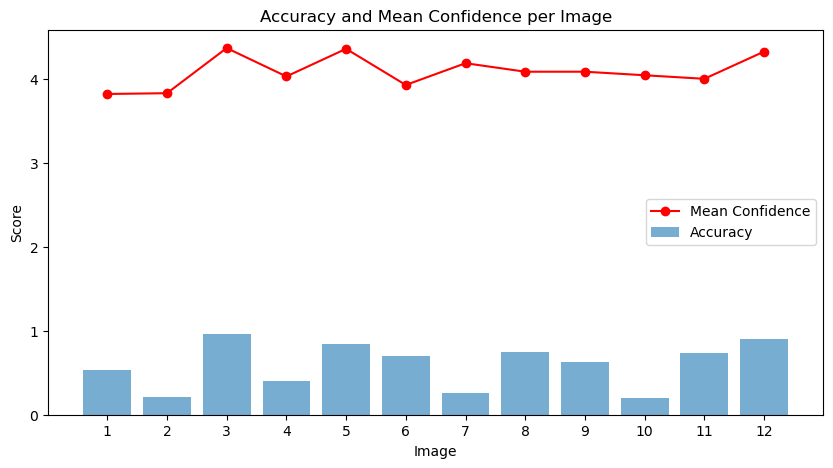

In [30]:
from scipy.stats import pearsonr  
import pandas as pd
import numpy as np

# Compute accuracy per image
accs = []
for i in range(12):
    pred = df[image_cols[i]]
    acc = (pred == correct_answers[i]).mean()
    accs.append(acc)

plt.figure(figsize=(10,5))
plt.bar(range(1,13), accs, alpha=0.6, label='Accuracy')
plt.plot(range(1,13), confidence_df['Mean_Confidence'], 'ro-', label='Mean Confidence')
plt.xlabel('Image')
plt.ylabel('Score')
plt.title('Accuracy and Mean Confidence per Image')
plt.legend()
plt.xticks(range(1,13))
plt.show()


## Confidence for Correct vs Wrong

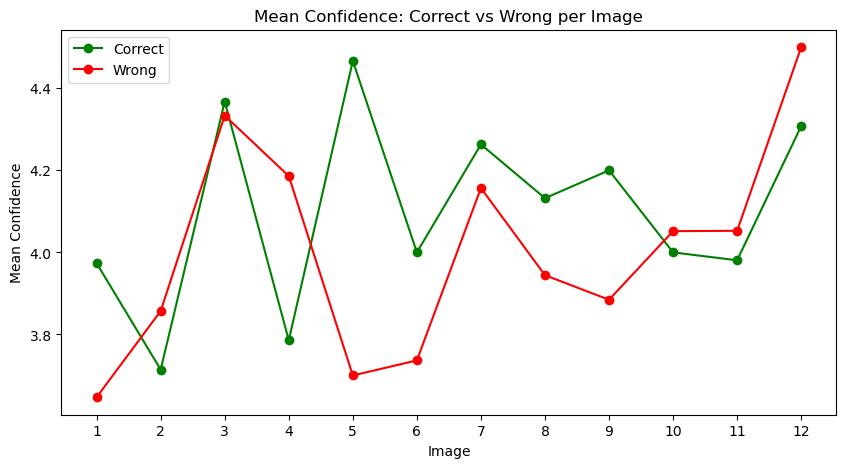

In [32]:
plt.figure(figsize=(10,5))
plt.plot(range(1,13), confidence_df['Mean_Confidence_Correct'], 'go-', label='Correct')
plt.plot(range(1,13), confidence_df['Mean_Confidence_Wrong'], 'ro-', label='Wrong')
plt.xlabel('Image')
plt.ylabel('Mean Confidence')
plt.title('Mean Confidence: Correct vs Wrong per Image')
plt.legend()
plt.xticks(range(1,13))
plt.show()


## Statistical Analysis (t-tests for confidence: correct vs wrong)

In [34]:
from scipy.stats import ttest_ind  

ttest_results = []
for i in range(12):
    conf = df[confidence_cols[i]]
    pred = df[image_cols[i]].dropna().astype(int)  # Clean data
    correct = pred == correct_answers[i]
    
    # Align confidence with cleaned predictions
    conf_aligned = conf.iloc[pred.index]
    
    correct_conf = conf_aligned[correct]
    wrong_conf = conf_aligned[~correct]
    
    if len(correct_conf) > 1 and len(wrong_conf) > 1:
        tstat, pval = ttest_ind(correct_conf, wrong_conf, nan_policy='omit')
    else:
        tstat, pval = np.nan, np.nan
        
    ttest_results.append({'Image': i+1, 't-stat': tstat, 'p-value': pval})

ttest_df = pd.DataFrame(ttest_results)
print(ttest_df)


    Image    t-stat   p-value
0       1  1.485362  0.141938
1       2 -0.430889  0.667912
2       3  0.074133  0.941119
3       4 -1.877014  0.064744
4       5  2.758167  0.007459
5       6  1.060090  0.292968
6       7  0.526077  0.600546
7       8  0.799842  0.426547
8       9  1.605924  0.112858
9      10 -0.192607  0.847832
10     11 -0.335973  0.737911
11     12 -0.568655  0.571436


## The OLS Regression

In [36]:
import statsmodels.api as sm

# Calculate mean confidence across ALL images for each participant
df['Mean_Confidence'] = df[confidence_cols].mean(axis=1)

# Merge with composite scores
model_data = df[['optimism_bias', 'heuristic_processing', 'systematic_processing', 'Mean_Confidence']].dropna()

# Regression: Confidence ~ Optimism + Heuristic + Systematic
model = sm.OLS(
    model_data['Mean_Confidence'],
    sm.add_constant(model_data[['optimism_bias', 'heuristic_processing', 'systematic_processing']])
).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        Mean_Confidence   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     9.272
Date:                Sat, 26 Apr 2025   Prob (F-statistic):           3.20e-05
Time:                        02:59:12   Log-Likelihood:                -55.930
No. Observations:                  72   AIC:                             119.9
Df Residuals:                      68   BIC:                             129.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.95

## OLS Regression findings

In [38]:

# OLS regression examined how optimism bias, heuristic processing, and systematic processing to predict participants' 
# mean confidence in detecting real/AI-generated images.

# - The model explained 29% of the variance in confidence (R-squared = 0.29).
# - The overall regression was statistically significant (F(3,68)=9.27, p<0.001).

# - All three predictors had significant positive effects on confidence:
#     - Optimism bias coefficient: 0.74 (p = 0.034)
#     - Heuristic processing coefficient: 0.65 (p = 0.029)
#     - Systematic processing coefficient: 0.62 (p = 0.049)

# - Interpretation:
#     - Higher optimism bias, greater reliance on heuristics, and more systematic processing
#       were all associated with higher self-reported confidence in image judgments.
#     - Notably, even systematic processing (verification behaviours) increased confidence,
#       suggesting that all cognitive styles contributed to confidence, regardless of actual accuracy.

# - Practical implication: Overconfidence in deepfake detection is driven by both cognitive biases
#   (optimism, heuristics) and verification efforts, highlighting the need for confidence calibration
#   in training and awareness interventions.



In [39]:
pip install pandoc

Note: you may need to restart the kernel to use updated packages.
